In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import pickle

In [2]:
def get_reports(y_test, y_pred):
    print("\nAccuracy:",accuracy_score(y_test, y_pred))
    print("Precision Score:",precision_score(y_test, y_pred, average = 'macro', zero_division=0))
    print("Recall Score:",recall_score(y_test, y_pred, average = 'macro', zero_division=0))
    print("f1 Score:",f1_score(y_test, y_pred, average = 'macro', zero_division=0))
    
    print("\n \nClassification Report:\n\n",classification_report(y_test, y_pred, zero_division=0))
    print("\n \nConfusion Matrix:\n")
    print(confusion_matrix(y_test, y_pred))

In [3]:
wine_data = pd.read_csv('F:/iPRIMED/Python/wine_quality_dataset/winequality-red.csv', delimiter=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0, 0.5, 'alcohol')

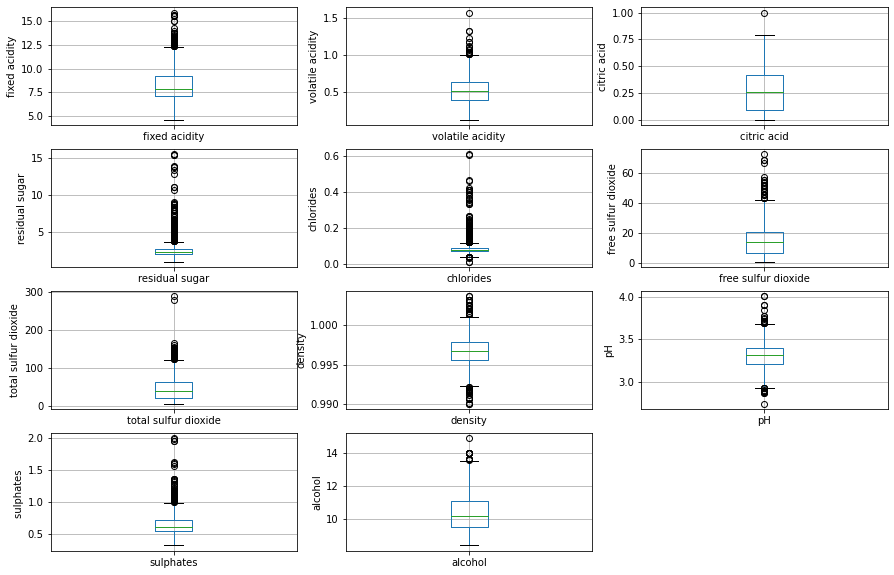

In [8]:
plt.figure(figsize = (15,10))

plt.subplot(4, 3, 1)
fig = wine_data.boxplot(column = 'fixed acidity')
fig.set_ylabel('fixed acidity')

plt.subplot(4, 3, 2)
fig = wine_data.boxplot(column = 'volatile acidity')
fig.set_ylabel('volatile acidity')

plt.subplot(4, 3, 3)
fig = wine_data.boxplot(column = 'citric acid')
fig.set_ylabel('citric acid')

plt.subplot(4, 3, 4)
fig = wine_data.boxplot(column = 'residual sugar')
fig.set_ylabel('residual sugar')

plt.subplot(4, 3, 5)
fig = wine_data.boxplot(column = 'chlorides')
fig.set_ylabel('chlorides')

plt.subplot(4, 3, 6)
fig = wine_data.boxplot(column = 'free sulfur dioxide')
fig.set_ylabel('free sulfur dioxide')

plt.subplot(4, 3, 7)
fig = wine_data.boxplot(column = 'total sulfur dioxide')
fig.set_ylabel('total sulfur dioxide')

plt.subplot(4, 3, 8)
fig = wine_data.boxplot(column = 'density')
fig.set_ylabel('density')

plt.subplot(4, 3, 9)
fig = wine_data.boxplot(column = 'pH')
fig.set_ylabel('pH')

plt.subplot(4, 3, 10)
fig = wine_data.boxplot(column = 'sulphates')
fig.set_ylabel('sulphates ')

plt.subplot(4, 3, 11)
fig = wine_data.boxplot(column = 'alcohol')
fig.set_ylabel('alcohol')

In [9]:
list(wine_data.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [10]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
def IQR_range(feature):
    
    Q1 = wine_data[feature].quantile(0.25)
    Q3 = wine_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    Lower_boundary = Q1 - 1.5 * IQR
    Upper_boundary = Q3 + 1.5 * IQR
    return Lower_boundary,Upper_boundary

In [12]:
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for x in numerical_features:
    Lower_boundary,Upper_boundary = IQR_range(x)
    wine_data.drop(wine_data[wine_data[x] > Upper_boundary].index, inplace = True)
    wine_data.drop(wine_data[wine_data[x] < Lower_boundary].index, inplace = True)   

In [13]:
for x in numerical_features:
    wine_data[x].fillna((wine_data[x].median()), inplace=True)

In [14]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
X = wine_data.iloc[:,:-1]
X_num = X
Y = wine_data.iloc[:, -1]
Y_num = Y
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
col_list = list(X.columns)
standard_scaler = StandardScaler()
data_tf = standard_scaler.fit_transform(X)
X = pd.DataFrame(data_tf, columns=col_list)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.517383,1.080055,-1.364671,-0.639225,-0.167169,-0.441353,-0.282198,0.790246,1.419610,-0.610668,-1.000189
1,-0.240257,2.173545,-1.364671,0.955325,1.434599,1.189601,1.058458,0.148087,-0.962884,0.460596,-0.580549
2,-0.240257,1.444552,-1.142773,0.271947,0.997753,0.024634,0.530321,0.276519,-0.501756,0.192780,-0.580549
3,2.115311,-1.471421,1.741897,-0.639225,-0.239977,0.257627,0.774077,0.918678,-1.270302,-0.432124,-0.580549
4,-0.517383,1.080055,-1.364671,-0.639225,-0.167169,-0.441353,-0.282198,0.790246,1.419610,-0.610668,-1.000189
...,...,...,...,...,...,...,...,...,...,...,...
1130,-1.348760,0.472561,-0.920875,-0.411432,0.852138,2.005078,0.124061,-1.072016,0.958482,-0.432124,0.153822
1131,-1.556604,0.168814,-0.809927,0.044154,-1.186476,2.820555,0.408443,-0.930741,1.496465,1.174772,0.888193
1132,-1.279478,-0.074184,-0.643503,0.271947,-0.167169,1.655588,-0.038443,-0.532602,0.727918,1.085500,0.678372
1133,-1.556604,0.745933,-0.698978,-0.411432,-0.239977,2.005078,0.124061,-0.705985,1.880738,0.728412,-0.160908


In [17]:
'''
col_list = list(X.columns)
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(X)
X = pd.DataFrame(data_tf, columns=col_list)
X
'''

'\ncol_list = list(X.columns)\nminmax = MinMaxScaler()\ndata_tf = minmax.fit_transform(X)\nX = pd.DataFrame(data_tf, columns=col_list)\nX\n'

In [18]:
'''
col_list = list(X.columns)
robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(X)
X = pd.DataFrame(data_tf, columns=col_list)
X
'''

'\ncol_list = list(X.columns)\nrobustscaler = RobustScaler()\ndata_tf = robustscaler.fit_transform(X)\nX = pd.DataFrame(data_tf, columns=col_list)\nX\n'

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2)
x_train.shape

(908, 11)

## Logistic Regression

In [20]:
log_clf = LogisticRegression(solver = 'lbfgs', max_iter = 10000, C = 1.0)
log_clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [21]:
log_clf.score(x_test, y_test)

0.6035242290748899

In [22]:
log_clf.score(x_train, y_train)

0.6255506607929515

In [23]:
y_pred_logf = log_clf.predict(x_test)

In [24]:
get_reports(y_test, y_pred_logf)


Accuracy: 0.6035242290748899
Precision Score: 0.27691529709228824
Recall Score: 0.27367534999113946
f1 Score: 0.27220978255461015

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.59      0.74      0.66        90
           6       0.64      0.58      0.61       110
           7       0.43      0.32      0.36        19
           8       0.00      0.00      0.00         2

    accuracy                           0.60       227
   macro avg       0.28      0.27      0.27       227
weighted avg       0.58      0.60      0.59       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 67 23  0  0]
 [ 0  0 38 64  8  0]
 [ 0  0  3 10  6  0]
 [ 0  0  0  2  0  0]]


## SVM

In [25]:
svc = SVC(kernel='poly',degree=5, C=1)

svc.fit(x_train, y_train)

SVC(C=1, degree=5, kernel='poly')

In [26]:
svc.score(x_test, y_test)

0.5418502202643172

In [27]:
svc.score(x_train, y_train)

0.7444933920704846

In [28]:
y_pred_svc = svc.predict(x_test)

In [29]:
get_reports(y_test, y_pred_svc)


Accuracy: 0.5418502202643172
Precision Score: 0.2809037670148781
Recall Score: 0.25059365585681376
f1 Score: 0.23927608506152567

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.51      0.92      0.66        90
           6       0.67      0.32      0.43       110
           7       0.50      0.26      0.34        19
           8       0.00      0.00      0.00         2

    accuracy                           0.54       227
   macro avg       0.28      0.25      0.24       227
weighted avg       0.57      0.54      0.50       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 83  7  0  0]
 [ 0  2 68 35  5  0]
 [ 0  0  6  7  5  1]
 [ 0  0  0  2  0  0]]


## Decision Tree

In [30]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 3)

In [31]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
dt.score(x_test, y_test)

0.5859030837004405

In [33]:
dt.score(x_train, y_train)

0.6167400881057269

In [34]:
y_pred_dt = dt.predict(x_test)

In [35]:
get_reports(y_test, y_pred_dt)


Accuracy: 0.5859030837004405
Precision Score: 0.2634854906704255
Recall Score: 0.2741981215665426
f1 Score: 0.26756990695102306

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.60      0.72      0.65        90
           6       0.62      0.55      0.58       110
           7       0.37      0.37      0.37        19
           8       0.00      0.00      0.00         2

    accuracy                           0.59       227
   macro avg       0.26      0.27      0.27       227
weighted avg       0.57      0.59      0.57       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 65 25  0  0]
 [ 0  0 38 61 11  0]
 [ 0  0  1 11  7  0]
 [ 0  0  0  1  1  0]]


## Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators=350, max_features=0.8, bootstrap=True, max_samples=0.6, max_depth=5, n_jobs = -1)

In [37]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.8, max_samples=0.6,
                       n_estimators=350, n_jobs=-1)

In [38]:
rf.score(x_test, y_test)

0.6431718061674009

In [39]:
rf.score(x_train, y_train)

0.7533039647577092

In [40]:
y_pred_rf = rf.predict(x_test)

In [41]:
get_reports(y_test, y_pred_rf)


Accuracy: 0.6431718061674009
Precision Score: 0.3153769841269842
Recall Score: 0.2879851143009038
f1 Score: 0.29290442275983813

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.62      0.77      0.68        90
           6       0.68      0.65      0.66       110
           7       0.60      0.32      0.41        19
           8       0.00      0.00      0.00         2

    accuracy                           0.64       227
   macro avg       0.32      0.29      0.29       227
weighted avg       0.62      0.64      0.63       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0 69 21  0  0]
 [ 0  0 35 71  4  0]
 [ 0  0  2 11  6  0]
 [ 0  0  0  2  0  0]]


## Naive Bayes

In [42]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [43]:
gnb.score(x_test, y_test)

0.5286343612334802

In [44]:
gnb.score(x_train, y_train)

0.5947136563876652

In [45]:
y_pred_gnb = gnb.predict(x_test)

In [46]:
get_reports(y_test, y_pred_gnb)


Accuracy: 0.5286343612334802
Precision Score: 0.2923668890093572
Recall Score: 0.3402445507708665
f1 Score: 0.3003766587696072

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.40      0.33         5
           5       0.57      0.73      0.64        90
           6       0.64      0.38      0.48       110
           7       0.26      0.53      0.35        19
           8       0.00      0.00      0.00         2

    accuracy                           0.53       227
   macro avg       0.29      0.34      0.30       227
weighted avg       0.56      0.53      0.52       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  2  2  1  0  0]
 [ 0  4 66 17  3  0]
 [ 0  1 44 42 23  0]
 [ 0  0  3  6 10  0]
 [ 0  0  0  0  2  0]]


## Nearest Neighbors 

In [47]:
acc_score = []
for k in range (1,50):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train, y_train)
    acc = knc.score(x_test, y_test)
    acc_score.append(acc)

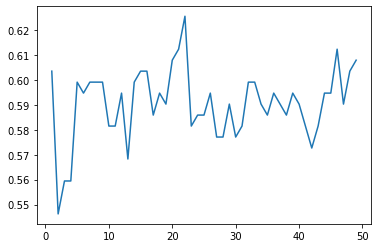

In [48]:
plt.plot(list(range(1,50)), acc_score)
plt.show()

In [49]:
knc = KNeighborsClassifier(n_neighbors= 18)

In [50]:
knc.fit(X,Y)

KNeighborsClassifier(n_neighbors=18)

In [51]:
knc.score(x_test, y_test)

0.6563876651982379

In [52]:
knc.score(x_train, y_train)

0.6486784140969163

In [53]:
y_pred_knc = knc.predict(x_test)

In [54]:
get_reports(y_test, y_pred_knc)


Accuracy: 0.6563876651982379
Precision Score: 0.32003503458923427
Recall Score: 0.3136275031011873
f1 Score: 0.3150631582512107

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.65      0.74      0.69        90
           6       0.67      0.66      0.67       110
           7       0.60      0.47      0.53        19
           8       0.00      0.00      0.00         2

    accuracy                           0.66       227
   macro avg       0.32      0.31      0.32       227
weighted avg       0.63      0.66      0.64       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 67 23  0  0]
 [ 0  0 31 73  6  0]
 [ 0  0  1  9  9  0]
 [ 0  0  0  2  0  0]]


In [55]:
acc_score_radius = []
for k in np.linspace (5.1, 10, 15):
    rnc = RadiusNeighborsClassifier(radius=k)
    rnc.fit(x_train, y_train)
    acc = rnc.score(x_test, y_test)
    acc_score_radius.append(acc)

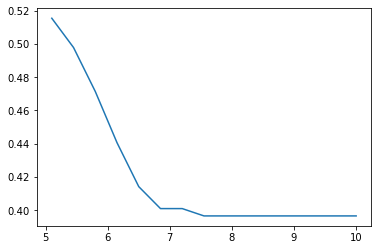

In [56]:
plt.plot(np.linspace (5.1, 10, 15), acc_score_radius)
plt.show()

In [57]:
rnc = RadiusNeighborsClassifier(radius= 5.5)

In [58]:
rnc.fit(X,Y)

RadiusNeighborsClassifier(radius=5.5)

In [59]:
rnc.score(x_test, y_test)

0.5198237885462555

In [60]:
rnc.score(x_train, y_train)

0.5506607929515418

In [61]:
y_pred_rnc = rnc.predict(x_test)

In [62]:
get_reports(y_test, y_pred_rnc)


Accuracy: 0.5198237885462555
Precision Score: 0.17850908872035634
Recall Score: 0.2047138047138047
f1 Score: 0.17984248903262512

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.49      0.86      0.63        90
           6       0.58      0.37      0.45       110
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2

    accuracy                           0.52       227
   macro avg       0.18      0.20      0.18       227
weighted avg       0.48      0.52      0.47       227


 
Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 77 13  0  0]
 [ 0  0 69 41  0  0]
 [ 0  0  5 14  0  0]
 [ 0  0  0  2  0  0]]


# Using Hyperparameter tuning 

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_num, Y_num, test_size=0.2) 

In [64]:
pipelines = []
model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB(), KNeighborsClassifier(), RadiusNeighborsClassifier()]

for model in model_list:
    pipeline= make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), model, verbose=True) 
    pipelines.append(pipeline)

In [72]:
param_list = [{'logisticregression__max_iter':list(range(500,20000,500)), 'logisticregression__solver':['newton-cg', 'lbfgs', 'saga']},
              {'decisiontreeclassifier__max_depth':[2,3,4,5,6,7,8], 'decisiontreeclassifier__min_samples_split':[2,3,4,5]},
              {'randomforestclassifier__n_estimators':[10,50,100,200,250], 'randomforestclassifier__max_depth':list(range(5,30,5)), 'randomforestclassifier__min_samples_split':[2,3,4,5]},
              {'svc__C':[5, 10, 100], 'svc__gamma': [1,0.1,0.01,0.001], 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'svc__degree':[3,4,5,6,7]},
              {'gaussiannb__var_smoothing': np.logspace(0,-9, num=10)},
              {'kneighborsclassifier__n_neighbors':list(range(2,15,1))},
              {'radiusneighborsclassifier__radius': np.linspace (1, 10, 18)}]

scoring = ['precision_macro', 'recall_macro', 'accuracy']

for pipeline, params in zip(pipelines, param_list):
    
    grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1,verbose=3)
    grid_search.fit(x_train, y_train)
    model = grid_search.best_estimator_
    print('\033[1m',"\n\nModel:",model[2],'\033[0m')
    with open(str(model[2])+'_model_wine_red.pickle', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    y_pred = model.predict(x_test)
    print("\nTest score:",model.score(x_test, y_test))
    print("Train score:",model.score(x_train, y_train),"\n")
    get_reports(y_test, y_pred)
    
    print("\nCross Validate:\n")
    cv = cross_validate(model, X_num, Y_num, scoring=scoring, cv=5)
    print("\nCross Validation:",model[2],"\n")
    print("Mean Accuracy:",cv['test_accuracy'].mean())
    print("Mean Precision:",cv['test_precision_macro'].mean())
    print("Mean Recall:",cv['test_recall_macro'].mean())
    print("\n\n")

Fitting 5 folds for each of 117 candidates, totalling 585 fits


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s
 

Model: LogisticRegression(max_iter=500, solver='newton-cg') 

Test score: 0.6035242290748899
Train score: 0.6376651982378855 


Accuracy: 0.6035242290748899
Precision Score: 0.31188071188071187
Recall Score: 0.27241594321729307
f1 Score: 0.27542193484441657

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.63      0.67       101
           6       0.52      0.74      0.61        89
           7       0.64      0.26      0.37        27
           8       0.00      0.00      0.00         2

    accuracy                           0.60       227
   macro avg       0.31      0.27      0.28       227
weighted a

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



Cross Validation: LogisticRegression(max_iter=500, solver='newton-cg') 

Mean Accuracy: 0.5876651982378855
Mean Precision: 0.3353812642113422
Mean Recall: 0.3072497423122923



Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
 

Model: DecisionTreeClassifier(max_depth=7, min_samples_split=3) 

Test score: 0.5638766519823789
Train score: 0.7599118942731278 


Accuracy: 0.5638766519823789
Precision Score: 0.3049961641733794
Recall Score: 0.27090998737826344
f1 Score: 0.275552443199502

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.52      0.59       101
           6       0.49      0.73   

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.

[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s

Cross Validation: DecisionTreeClassifier(max_depth=7, min_samples_split=3) 

Mean Accuracy: 0.5180616740088106
Mean Precision: 0.304416248574481
Mean Recall: 0.26792773727632146



Fitting 5 folds for e

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   1.2s
 

Model: RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=200) 

Test score: 0.7092511013215859
Train score: 1.0 


Accuracy: 0.7092511013215859
Precision Score: 0.5262886241504663
Recall Score: 0.42647426415550416
f1 Score: 0.4577972731062556

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.78      0.74      0.76       101
           6       0.64      0.80      0.71        89
           7       0.74      0.52      0.61        27
           8       1.00      0.50      0.67         2

    accuracy                           0.71       227
   macro avg       0.53      0.43      0.46       227


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   1.1s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   1.4s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   1.1s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   1.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   1.1s

Cross Validation: RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=200) 

Mean Accuracy: 0.5894273127753303
Mean Precision: 0.3113970112215015
Mean Recall: 0.3023509861865325



Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.3s
 

Model: SVC(C=5, gamma=1) 

Test score: 0.6607929515418502
Train score: 0.9966960352422908 


Accuracy: 0.6607929515418502
Precision Score: 0.5065203641063719
Recall Score: 0.3986096175160587
f1 Score: 0.431688014162241

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.68      0.71       101
           6       0.59      0.76      0.67        89
           7       0.71      0.44      0.55        27
           8       1.00      0.50      0.67         2

    accuracy                           0.66       227
   macro avg       0.51      0.40      0.43       227
weighted avg       0.65      0.66      0.65      

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.2s

Cross Validation: SVC(C=5, gamma=1) 

Mean Accuracy: 0.4977973568281938
Mean Precision: 0.25597064041703355
Mean Recall: 0.2445120470102073



Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing gaussiannb, total=   0.0s
 

Model: GaussianNB(var_smoothing=1.0) 

Test score: 0.5242290748898678
Train score: 0.6035242290748899 


Accuracy: 0.5242290748898678
Precision Score: 0.34214246446242047
Recall Score: 0.2126845019083681
f1 Score: 0.201007326007326

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.61      0.64      0.62       101
           6       0.45      0.60      0.51        89
           7       1.00      0.04      0.07        27
           8       0.00      0.00      0.00         2

    accuracy                           0.52       227
   macro avg       0.34      0.21      0.20       227
weighted avg       0.56      0.52   

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to

[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing gaussiannb, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing gaussiannb, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing gaussiannb, total=   0.0s

Cross Validation: GaussianNB(var_smoothing=1.0) 

Mean Accuracy: 0.5876651982378854
Mean Precision: 0.33967851493251455
Mean Recall: 0.28467223822942905



Fitting 5 folds for each of 13 candidates, totalling 65 fits


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=   0.0s
 

Model: KNeighborsClassifier(n_neighbors=12) 

Test score: 0.5770925110132159
Train score: 0.6519823788546255 


Accuracy: 0.5770925110132159
Precision Score: 0.2901832503336263
Recall Score: 0.27838070948168475
f1 Score: 0.2807151700531643

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.63      0.64       101
           6       0.51      0.63      0.56        89
           7       0.58      0.41      0.48        27
           8       0.00      0.00      0.00         2

    accuracy                           0.58       227
   macro avg       0.29      0.28      0.28       227
weighted avg       0.56   

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to

[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=   0.0s

Cross Validation: KNeighborsClassifier(n_neighbors=12) 

Mean Accuracy: 0.5409691629955947
Mean Precision: 0.28502416169411415
Mean Recall: 0.27963734095585



Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [     

[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing radiusneighborsclassifier, total=   0.0s
 

Model: RadiusNeighborsClassifier(radius=2.588235294117647) 

Test score: 0.5550660792951542
Train score: 0.6090308370044053 


Accuracy: 0.5550660792951542
Precision Score: 0.35092226613965743
Recall Score: 0.22920331983260747
f1 Score: 0.22186252612937096

 
Classification Report:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.63      0.68      0.65       101
           6       0.48      0.62      0.54        89
           7       1.00      0.07      0.14        27
           8       0.00      0.00      0.00         2

    accuracy                           0.56       227
   macro avg       0.35      0.23      0.22       227
weig

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to

[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing radiusneighborsclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing radiusneighborsclassifier, total=   0.0s

Cross Validation: RadiusNeighborsClassifier(radius=2.588235294117647) 

Mean Accuracy: 0.5674008810572688
Mean Precision: 0.31684685276925123
Mean Recall: 0.25612451516914797





C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
